In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import numpy as np
import os
from datetime import date    
today = date.today()
## Get output folder
dr = str(today.year)+str(today.month).zfill(2)
os.chdir('/Users/sara.runkel/Documents/13000Cities/')
output_dir = '/Users/sara.runkel/Documents/13000Cities/Outputs/' + dr +'/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print('Made monthly output directory')
if not os.path.exists(output_dir+today.isoformat()):
    os.makedirs(output_dir+today.isoformat())
    print('Made daily output directory')
output_dir = '/Users/sara.runkel/Documents/13000Cities/Outputs/' + dr +'/' + today.isoformat() +'/'

In [2]:
df = pd.read_csv('Inputs/US_LeadersLaggards_ds.csv')

In [219]:
xls = pd.ExcelFile('./demographic/MSAGDP/MSA_Population.xlsx')
us = pd.read_excel(xls,'usa')

In [220]:
df['PopPercChange']=(df.Population-df.Base_Population)/df.Base_Population

In [221]:
anomaly = us.merge(df[['CityCountry','GDPBins','PopPercChange','PopChange','PopChangeBins','PerCapita','Region','Base_NO2','Base_PerCapita']], how = 'left',on='CityCountry')

In [222]:
anomaly = anomaly.merge(anomaly.set_index('CityCountry').groupby(['Region',"Year"],group_keys=True)['NO2'].apply(lambda x: x-x.mean()).reset_index().drop_duplicates().rename(columns={'NO2':'RegionAnomaly'}),how='left')

In [223]:
bins = list(anomaly['Population'].quantile([0,0.25,.5,0.75,1]))
anomaly['PopPerc']=pd.cut(anomaly['Population'], bins=bins, include_lowest=True)

In [224]:
bins = list(anomaly['PopPercChange'].quantile([0,0.25,.5,0.75,1]))
anomaly['PopChPerc']=pd.cut(anomaly['PopPercChange'], bins=bins, include_lowest=True)

In [48]:
lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r']
lbl1 = ['Q1','Q1','Q1','Q1', 'Q2','Q2','Q2','Q2',
        'Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4']


In [225]:
bins = list(anomaly['Base_NO2'].quantile([0,0.25,.5,0.75,1]))

anomaly['NO2Start']=pd.cut(anomaly.Base_NO2, bins=bins, include_lowest=True)

In [50]:
anomaly

CityCountry  Memberships      continent  Year  \
0          Honolulu, United States (1)            2  North America  2010   
1       Santa Maria, United States (3)            0  North America  2010   
2          Monterey, United States (4)            0  North America  2010   
3     Santa Barbara, United States (5)            1  North America  2010   
4        Santa Cruz, United States (6)            1  North America  2010   
...                                ...          ...            ...   ...   
3295      Nashua, United States (1029)            1  North America  2019   
3296      Lowell, United States (1030)            0  North America  2019   
3297  Manchester, United States (1033)            1  North America  2019   
3298    Lawrence, United States (1034)            1  North America  2019   
3299    Portland, United States (1050)            2  North America  2019   

               City        Country  Latitude  Longitude  Population    NO2  \
0          Honolulu  United States   21.3407  -157.8940      509540   8.24   
1       Santa Maria  United States   34.9231  -120.4340      127021   8.92   
2          Monterey  United States   36.6077  -121.8820      415057   9.33   
3     Santa Barbara  United States   34.4268  -119.7440      124350   8.83   
4        Santa Cruz  United States   36.9713  -121.9790      113059   8.90   
...             ...            ...       ...        ...         ...    ...   
3295         Nashua  United States   42.7554   -71.4775       77424   7.59   
3296         Lowell  United States   42.6392   -71.3191      122068  12.56   
3297     Manchester  United States   42.9748   -71.4524       99831   9.32   
3298       Lawrence  United States   42.7093   -71.1636      131959  12.05   
3299       Portland  United States   43.6582   -70.2933      103478   8.88   

      ...                                          NAME_LIST  \
0     ...                Honolulu; Waipahu; Pearl City; Aiea   
1     ...                                        Santa Maria   
2     ...                                           Monterey   
3     ...                                      Santa Barbara   
4     ...                                         Santa Cruz   
...   ...                                                ...   
3295  ...                                             Nashua   
3296  ...                                             Lowell   
3297  ...                                         Manchester   
3298  ...  Lawrence; Methuen; Andover; North Andover; Nor...   
3299  ...                                           Portland   

                GDPBins  PopChange        PopChangeBins  PerCapita  Region  \
0      (52.756, 64.503]       4159  (-137344.0, 4574.0]  59.989813   Other   
1      (52.756, 64.503]       7002    (4574.0, 12925.5]  60.625836      SW   
2      (52.756, 64.503]      23978   (12925.5, 28675.0]  60.884164      SW   
3      (52.756, 64.503]       6841    (4574.0, 12925.5]  60.625836      SW   
4      (42.965, 52.756]       2722  (-137344.0, 4574.0]  51.709066      SW   
...                 ...        ...                  ...        ...     ...   
3295   (52.756, 64.503]       3453  (-137344.0, 4574.0]  60.304248      NE   
3296  (64.503, 393.912]       2665  (-137344.0, 4574.0]  87.075005      NE   
3297   (52.756, 64.503]       4516  (-137344.0, 4574.0]  60.304248      NE   
3298  (64.503, 393.912]       3140  (-137344.0, 4574.0]  87.075005      NE   
3299   (11.959, 42.965]       5325    (4574.0, 12925.5]  11.959000      NE   

     Base_NO2 RegionAnomaly                 PopPerc         NO2Start  
0        8.24     -2.905000  (281418.0, 16518285.0]    (5.669, 9.93]  
1        8.92     -3.056143    (126944.0, 281418.0]    (5.669, 9.93]  
2        9.33     -2.646143  (281418.0, 16518285.0]    (5.669, 9.93]  
3        8.83     -3.146143    (84634.75, 126944.0]    (5.669, 9.93]  
4        8.90     -3.076143    (84634.75, 126944.0]    (5.669, 9.93]  
...       ...           ...                  

/var/folders/zc/2k6k2snx5pg27jkblzj0tmy40000gq/T/ipykernel_98157/3889340362.py:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g=sns.relplot(


<Figure size 1800x1800 with 0 Axes>

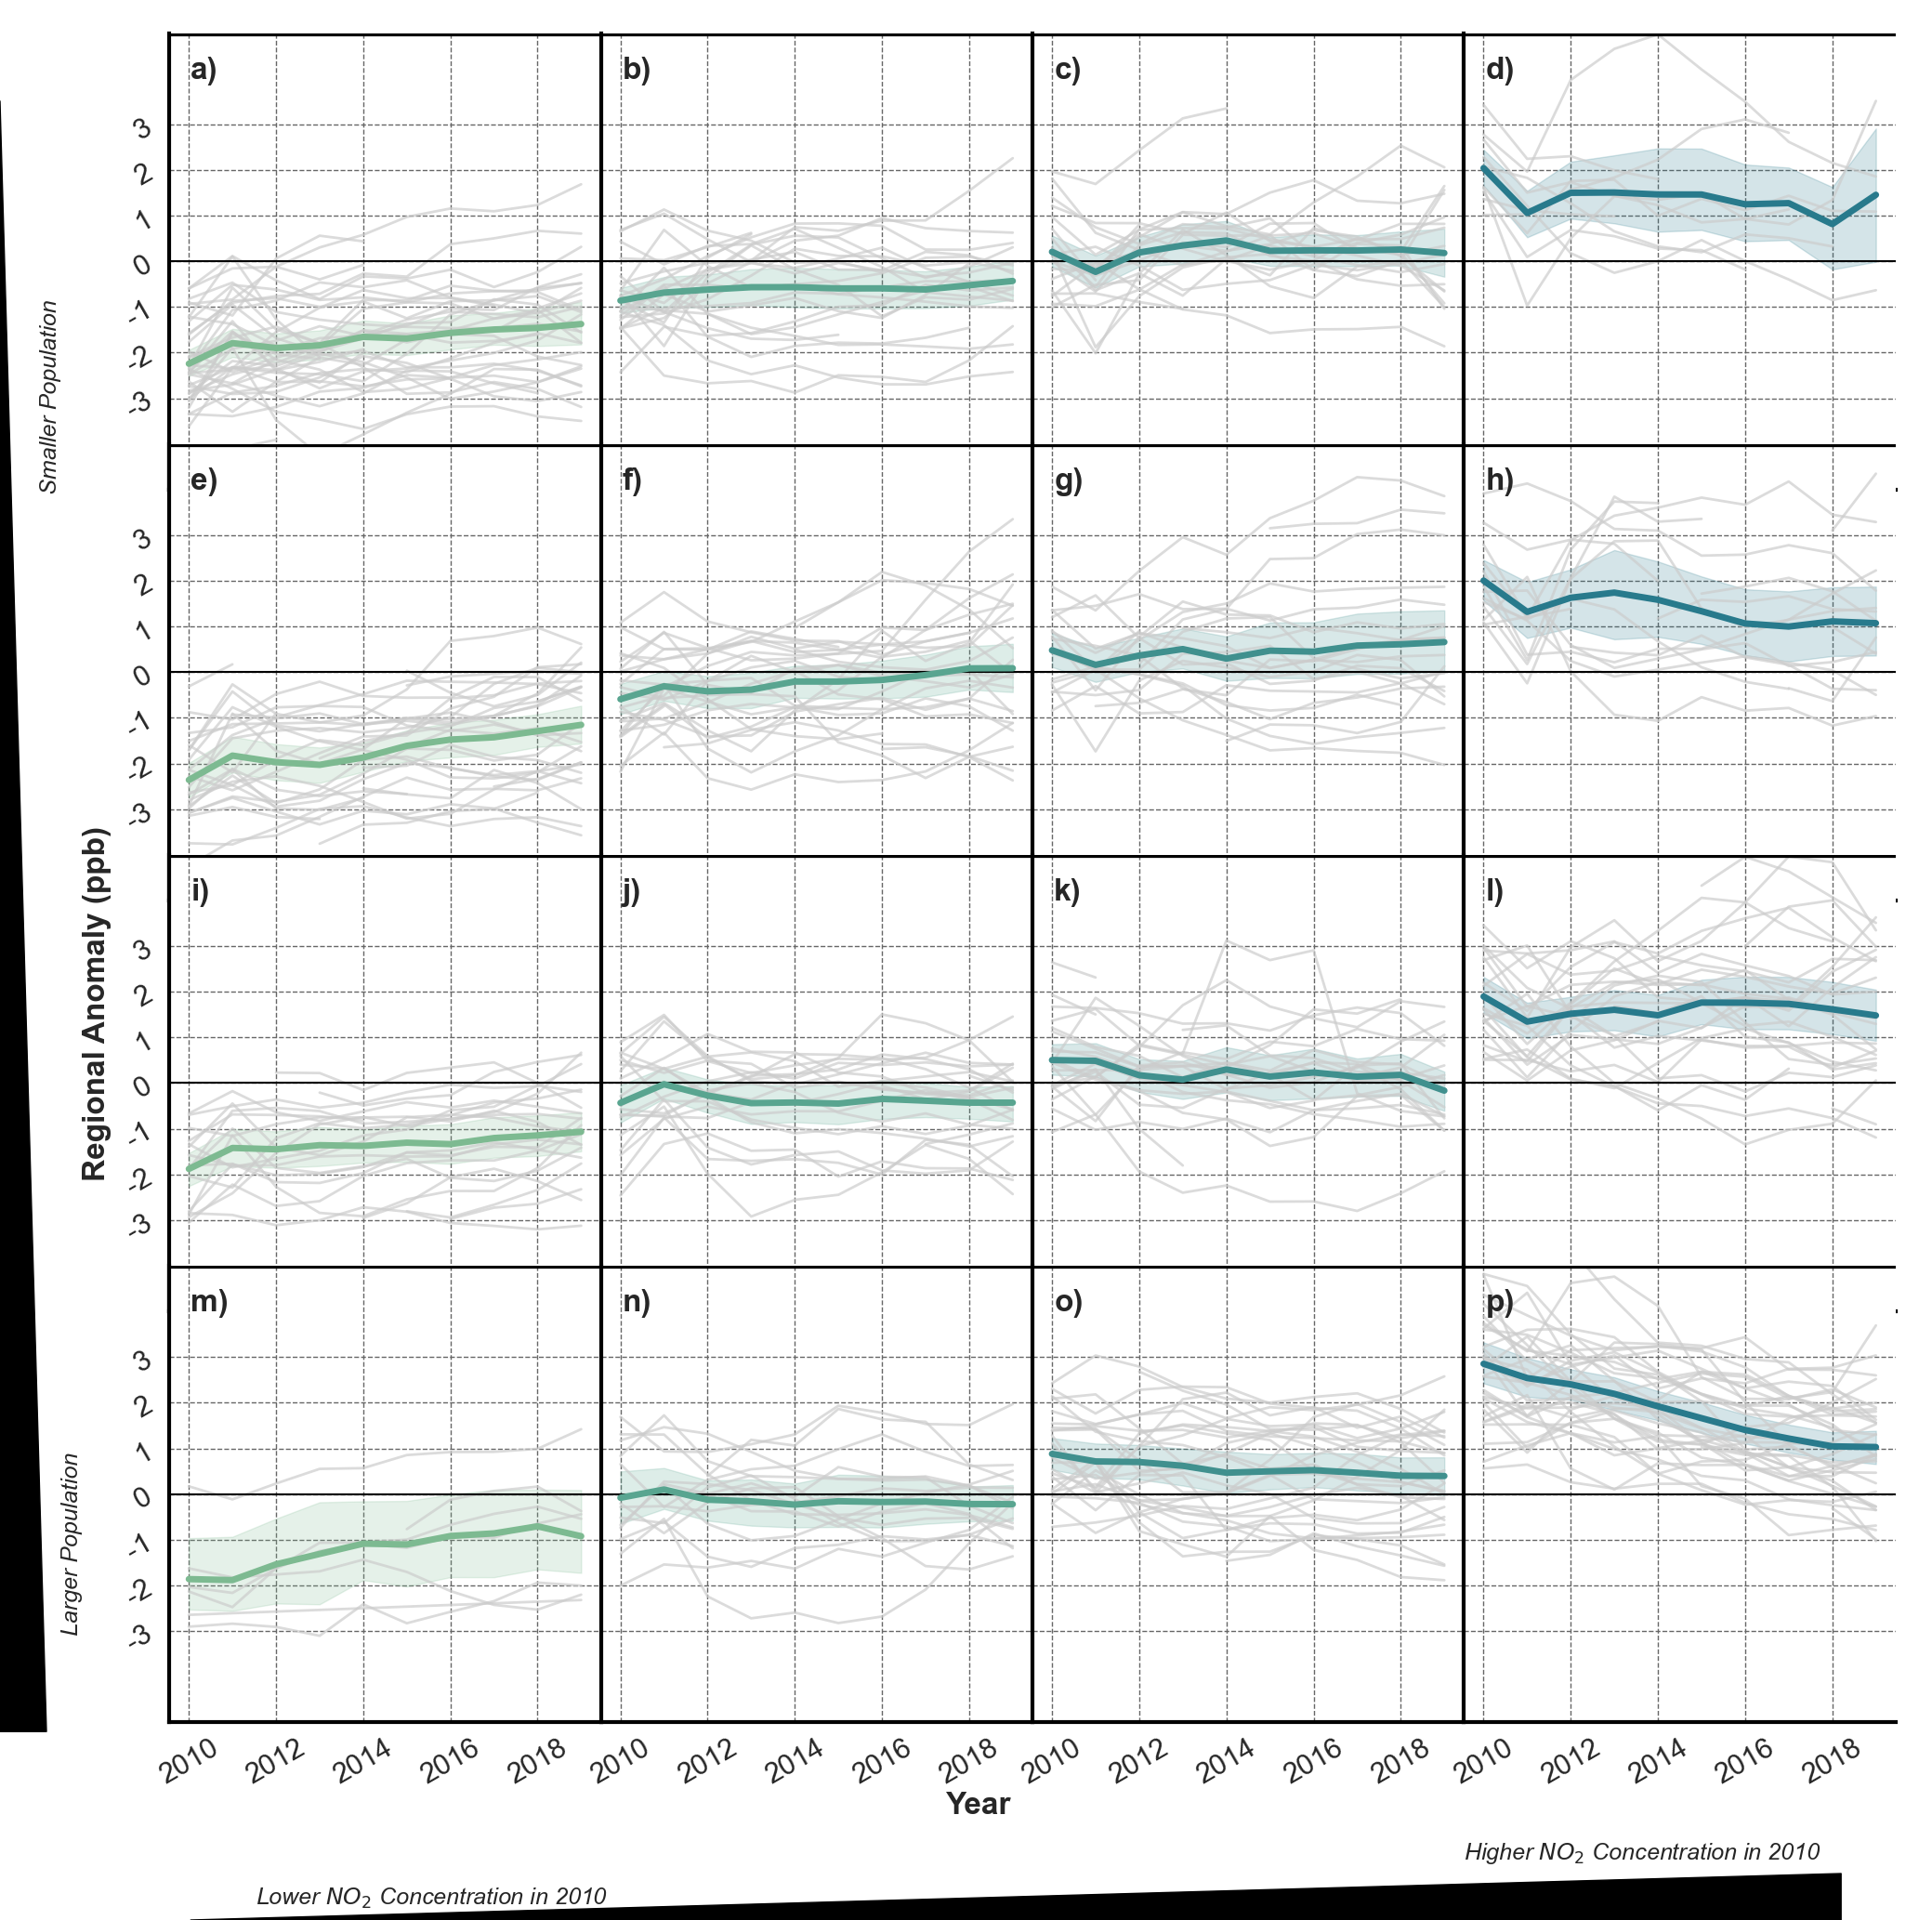

In [52]:
fig = plt.figure(figsize=(18, 18))
#sns.set_theme(style="whitegrid")
#ig.update_layout(margin=dict(l=10))
sns.set(font_scale=2,rc={'figure.figsize':(14,14)})
custom = {"grid.linestyle": "dashed", "grid.color": "0.4"}

sns.set_style("whitegrid",custom)
palette = sns.color_palette("crest")
g=sns.relplot(
    data=anomaly, kind="line",
    x="Year", y="RegionAnomaly",row='PopPerc',
    col="NO2Start", size_order=[1.0,0.75,0.5,0.25],
    zorder=10, linewidth=5, hue='NO2Start',legend=False,palette=palette
)

count = 0 
for state, ax in g.axes_dict.items():
    ax.text(0.05, 0.9, lbl[count] +')', transform=ax.transAxes, fontweight="bold")
    #ax.text(.1, 1.15, 'Population  '+lbl1[count], transform=ax.transAxes,fontsize=16)
    #ax.text(.1, 1.05, 'NO2 in 2010 (ppb): '+state[1], transform=ax.transAxes,fontsize=16)
    if count==0:
        ax.annotate(text = '', xytext=(0,0.1),xy=(0,0.98),xycoords='figure fraction',arrowprops=dict(facecolor='black', edgecolor = 'black',arrowstyle=mpl.patches.ArrowStyle("wedge, tail_width=3"),zorder=3))
        ax.annotate(text = '', xy=(.1,0),xytext=(.98,0),xycoords='figure fraction',arrowprops=dict(facecolor='black', edgecolor = 'black',arrowstyle=mpl.patches.ArrowStyle("wedge, tail_width=3")),zorder=100)
        ax.text(-0.2,-1.5,s= 'Regional Anomaly (ppb)',transform=ax.transAxes,rotation='vertical',fontweight='bold')
        ax.text(-0.25,-2.5,s= r'Larger Population',transform=ax.transAxes,rotation='vertical',fontstyle='italic',fontsize=18)
        ax.text(-0.3,0,s= r'Smaller Population',transform=ax.transAxes,rotation='vertical',fontstyle='italic',fontsize=18)
        ax.margins
    if count == 12:
        ax.text(1.8,-0.2,s= 'Year',transform=ax.transAxes,rotation='horizontal',fontweight='bold')
        ax.text(0.2,-0.4,s= r'Lower $NO_{2}$ Concentration in 2010',transform=ax.transAxes,rotation='horizontal',fontstyle='italic',fontsize=18)
        ax.text(3,-0.3,s= r'Higher $NO_{2}$ Concentration in 2010',transform=ax.transAxes,rotation='horizontal',fontstyle='italic',fontsize=18)
    sns.lineplot(
        data=anomaly.query('PopPerc ==@state[0] & NO2Start ==@state[1]'), x="Year", y="RegionAnomaly", units="CityCountry",
        estimator=None, color='0.8',alpha = 0.7,linewidth=2, ax=ax,zorder=1
    )
    count +=1
for ax in g.axes.flat:
    ax.set_xticks(ticks=range(2010, 2019,2),labels =range(2010, 2019,2), rotation=30)
    ax.set_ylim([-5,5])
    ax.set_yticks(ticks=range(-3, 4,1),labels =range(-3, 4,1), rotation=30)
    #ax.set_yticks(ticks = range)
    # Add the title as an annotation within the plot
    for _,s in ax.spines.items():
        s.set_linewidth(3)
        s.set_color('black')
    ax.axhline(0, color='black',zorder=1)
    ax.axhline(5, color='black',linewidth=4.5,zorder=10)

g.set_titles("")
#g.despine(bottom=True)
g.add_legend()
#g.set_axis_labels("Year", "Regional Anomaly (ppb)")
#g.set_xticks(range(len(df)), labels=range(2010, 2019))
#g.tight_layout()
g.set_axis_labels("", "")
plt.subplots_adjust(hspace=-0.1, wspace=0)
#g.title('NO2 Anomaly from National Mean')
plt.savefig(output_dir+'/AnomalyRegion_no2start_pop_TEST.png')

In [226]:
anomaly['GDPCapPerc']= (anomaly['PerCapita']-anomaly['Base_PerCapita'])/anomaly['Base_PerCapita']

bins = list(anomaly['GDPCapPerc'].quantile([0,0.25,.5,0.75,1]))
anomaly['GDPPerc']=pd.cut(anomaly['GDPCapPerc'], bins=bins, include_lowest=True)

In [233]:
(anomaly.GDPCapPerc*100).min()

-62.63309634974764

/var/folders/zc/2k6k2snx5pg27jkblzj0tmy40000gq/T/ipykernel_98157/573573307.py:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g=sns.relplot(


<Figure size 1800x1800 with 0 Axes>

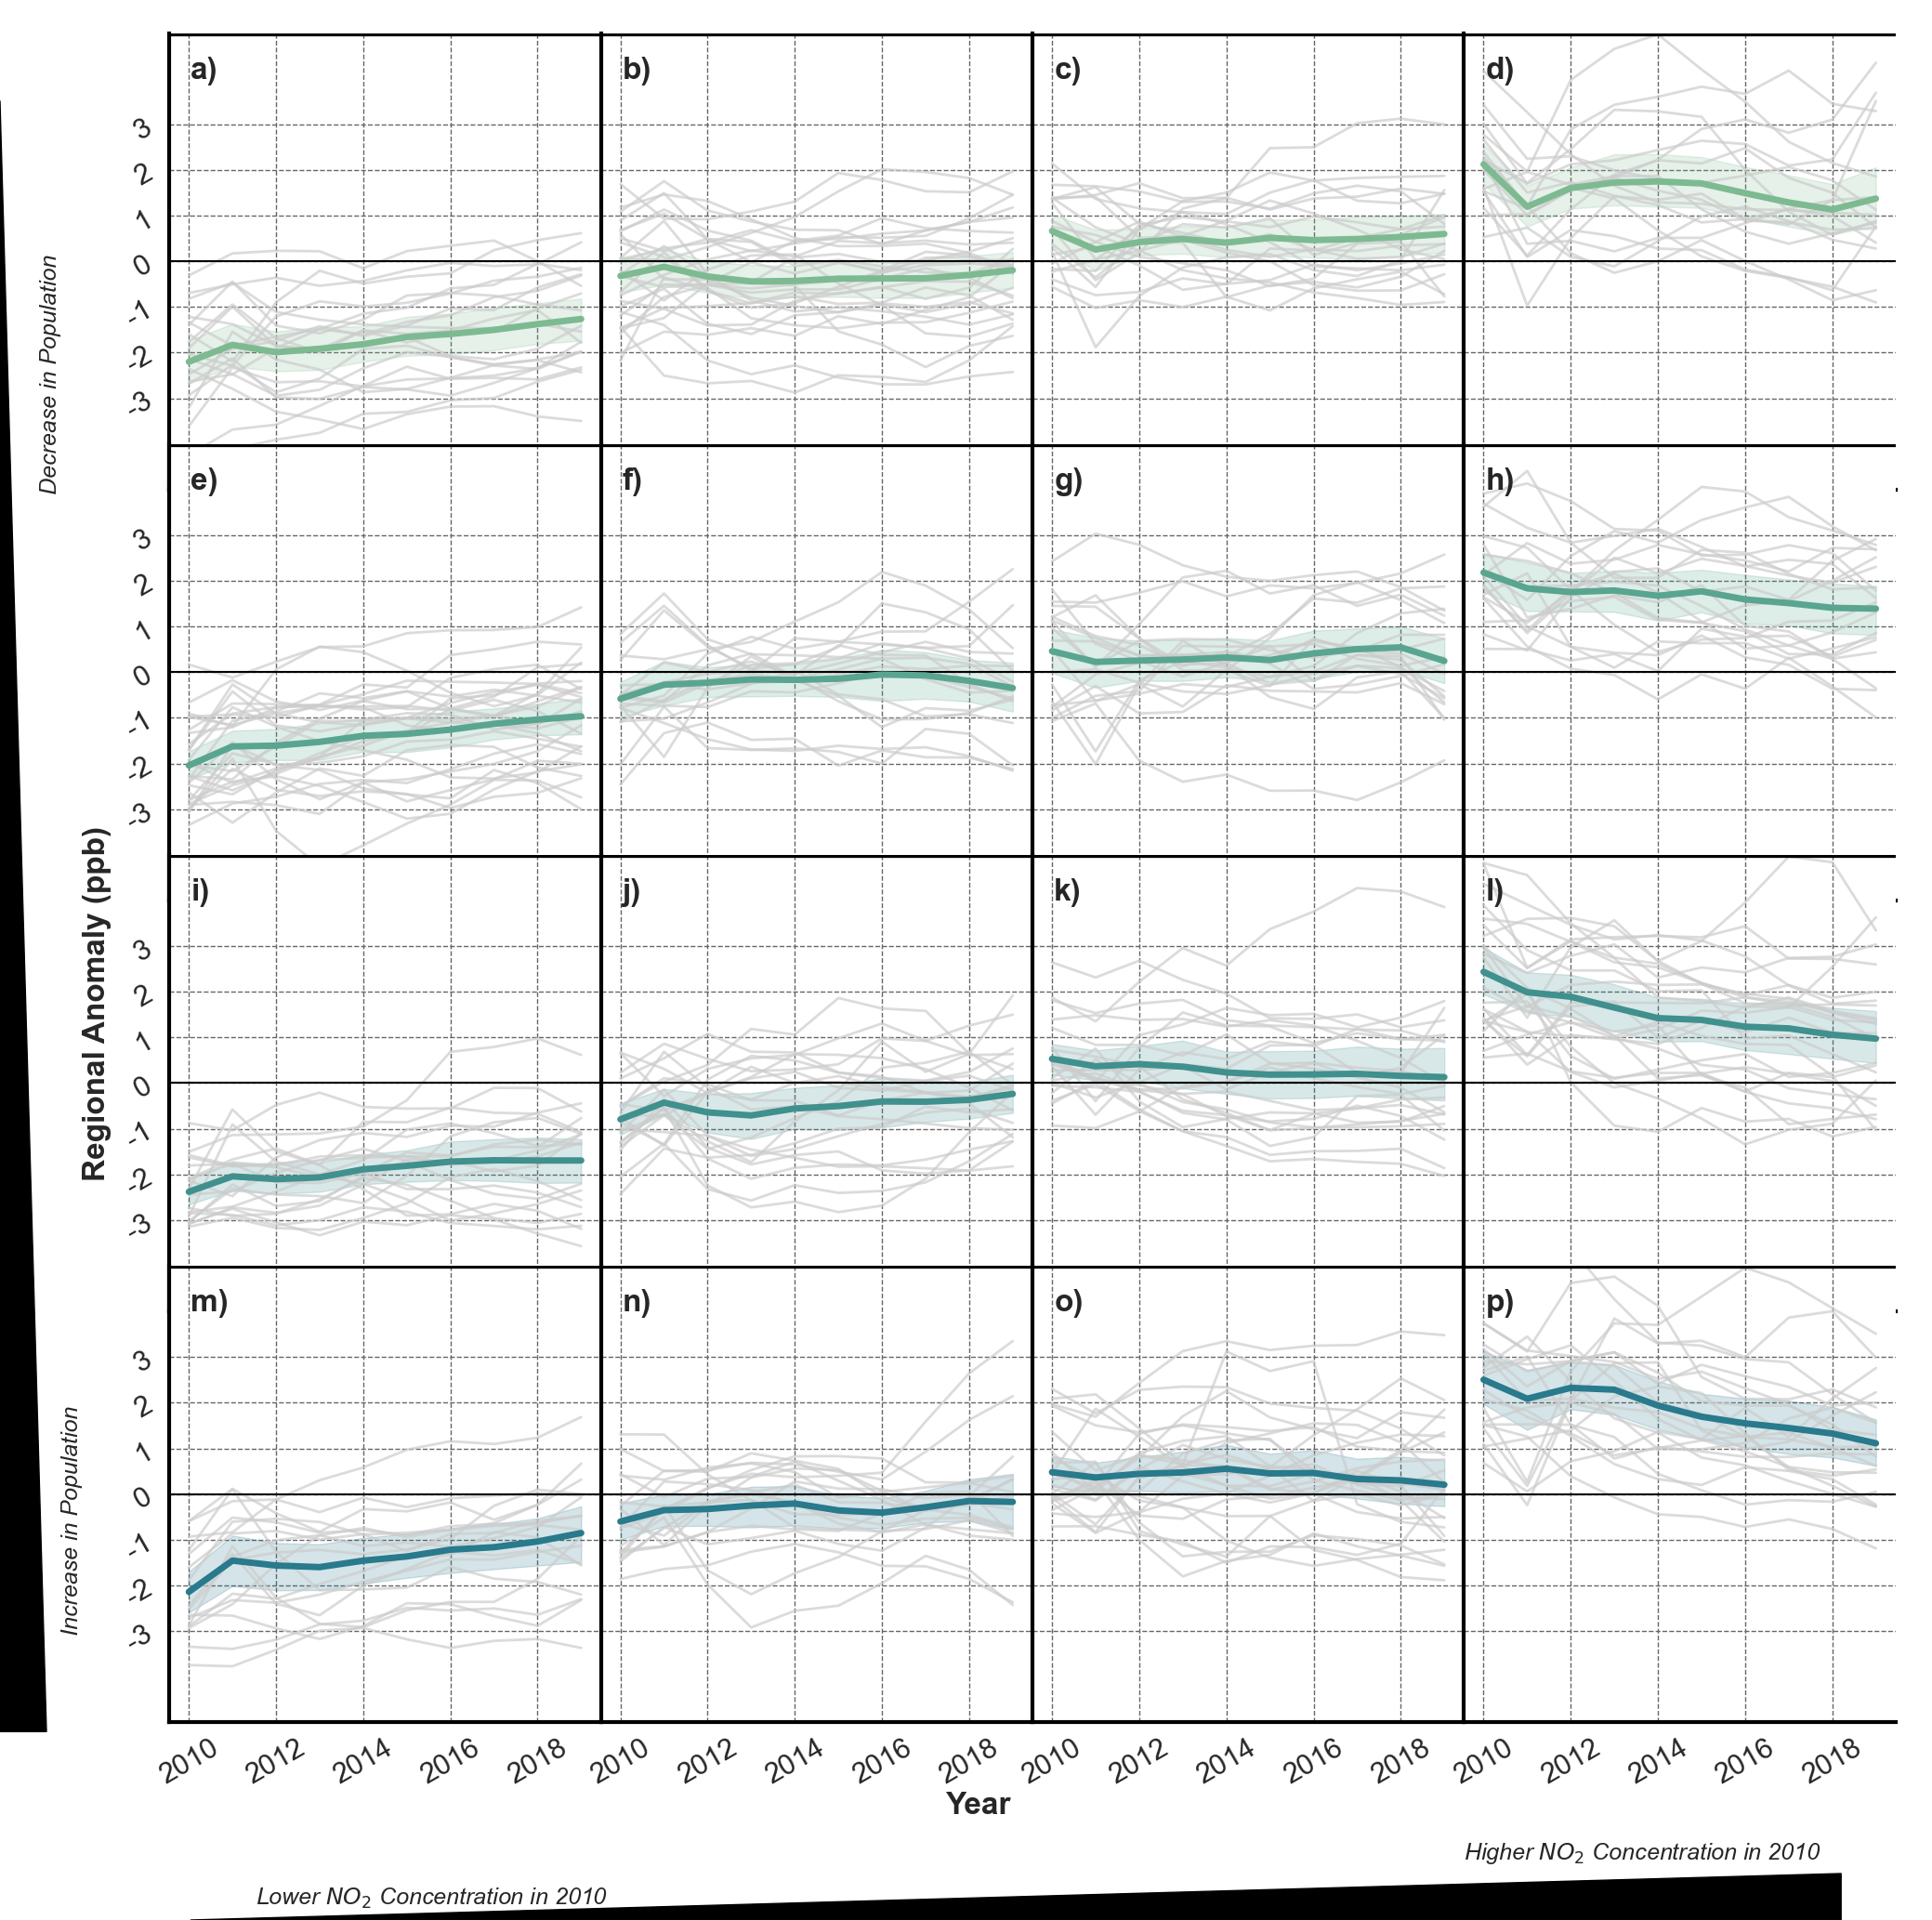

In [229]:
fig = plt.figure(figsize=(18, 18))
#sns.set_theme(style="whitegrid")
#ig.update_layout(margin=dict(l=10))
sns.set(font_scale=2,rc={'figure.figsize':(14,14)})
custom = {"grid.linestyle": "dashed", "grid.color": "0.4"}

sns.set_style("whitegrid",custom)
palette = sns.color_palette("crest")
g=sns.relplot(
    data=anomaly, kind="line",
    x="Year", y="RegionAnomaly",row='GDPPerc',
    col="NO2Start", size_order=[1.0,0.75,0.5,0.25],
    zorder=10, linewidth=5, hue='GDPPerc',legend=False,palette=palette
)

count = 0 
for state, ax in g.axes_dict.items():
    ax.text(0.05, 0.9, lbl[count] +')', transform=ax.transAxes, fontweight="bold")
    #ax.text(.1, 1.15, 'Population  '+lbl1[count], transform=ax.transAxes,fontsize=16)
    #ax.text(.1, 1.05, 'NO2 in 2010 (ppb): '+state[1], transform=ax.transAxes,fontsize=16)
    if count==0:
        ax.annotate(text = '', xytext=(0,0.1),xy=(0,0.98),xycoords='figure fraction',arrowprops=dict(facecolor='black', edgecolor = 'black',arrowstyle=mpl.patches.ArrowStyle("wedge, tail_width=3"),zorder=3))
        ax.annotate(text = '', xy=(.1,0),xytext=(.98,0),xycoords='figure fraction',arrowprops=dict(facecolor='black', edgecolor = 'black',arrowstyle=mpl.patches.ArrowStyle("wedge, tail_width=3")),zorder=100)
        ax.text(-0.2,-1.5,s= 'Regional Anomaly (ppb)',transform=ax.transAxes,rotation='vertical',fontweight='bold')
        ax.text(-0.25,-2.5,s= r'Increase in Population',transform=ax.transAxes,rotation='vertical',fontstyle='italic',fontsize=18)
        ax.text(-0.3,0,s= r'Decrease in Population',transform=ax.transAxes,rotation='vertical',fontstyle='italic',fontsize=18)
        ax.margins
    if count == 12:
        ax.text(1.8,-0.2,s= 'Year',transform=ax.transAxes,rotation='horizontal',fontweight='bold')
        ax.text(0.2,-0.4,s= r'Lower $NO_{2}$ Concentration in 2010',transform=ax.transAxes,rotation='horizontal',fontstyle='italic',fontsize=18)
        ax.text(3,-0.3,s= r'Higher $NO_{2}$ Concentration in 2010',transform=ax.transAxes,rotation='horizontal',fontstyle='italic',fontsize=18)
    sns.lineplot(
        data=anomaly.query('GDPPerc ==@state[0] & NO2Start ==@state[1]'), x="Year", y="RegionAnomaly", units="CityCountry",
        estimator=None, color='0.8',alpha = 0.7,linewidth=2, ax=ax,zorder=1
    )
    count +=1
for ax in g.axes.flat:
    ax.set_xticks(ticks=range(2010, 2019,2),labels =range(2010, 2019,2), rotation=30)
    ax.set_ylim([-5,5])
    ax.set_yticks(ticks=range(-3, 4,1),labels =range(-3, 4,1), rotation=30)
    #ax.set_yticks(ticks = range)
    # Add the title as an annotation within the plot
    for _,s in ax.spines.items():
        s.set_linewidth(3)
        s.set_color('black')
    ax.axhline(0, color='black',zorder=1)
    ax.axhline(5, color='black',linewidth=4.5,zorder=10)

g.set_titles("")
#g.despine(bottom=True)
g.add_legend()
#g.set_axis_labels("Year", "Regional Anomaly (ppb)")
#g.set_xticks(range(len(df)), labels=range(2010, 2019))
#g.tight_layout()
g.set_axis_labels("", "")
plt.subplots_adjust(hspace=-0.1, wspace=0)
#g.title('NO2 Anomaly from National Mean')
#plt.savefig(output_dir+'/AnomalyRegion_no2start_PopChangePerc.png')

/var/folders/zc/2k6k2snx5pg27jkblzj0tmy40000gq/T/ipykernel_98157/1902968104.py:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g=sns.relplot(


<Figure size 1800x1800 with 0 Axes>

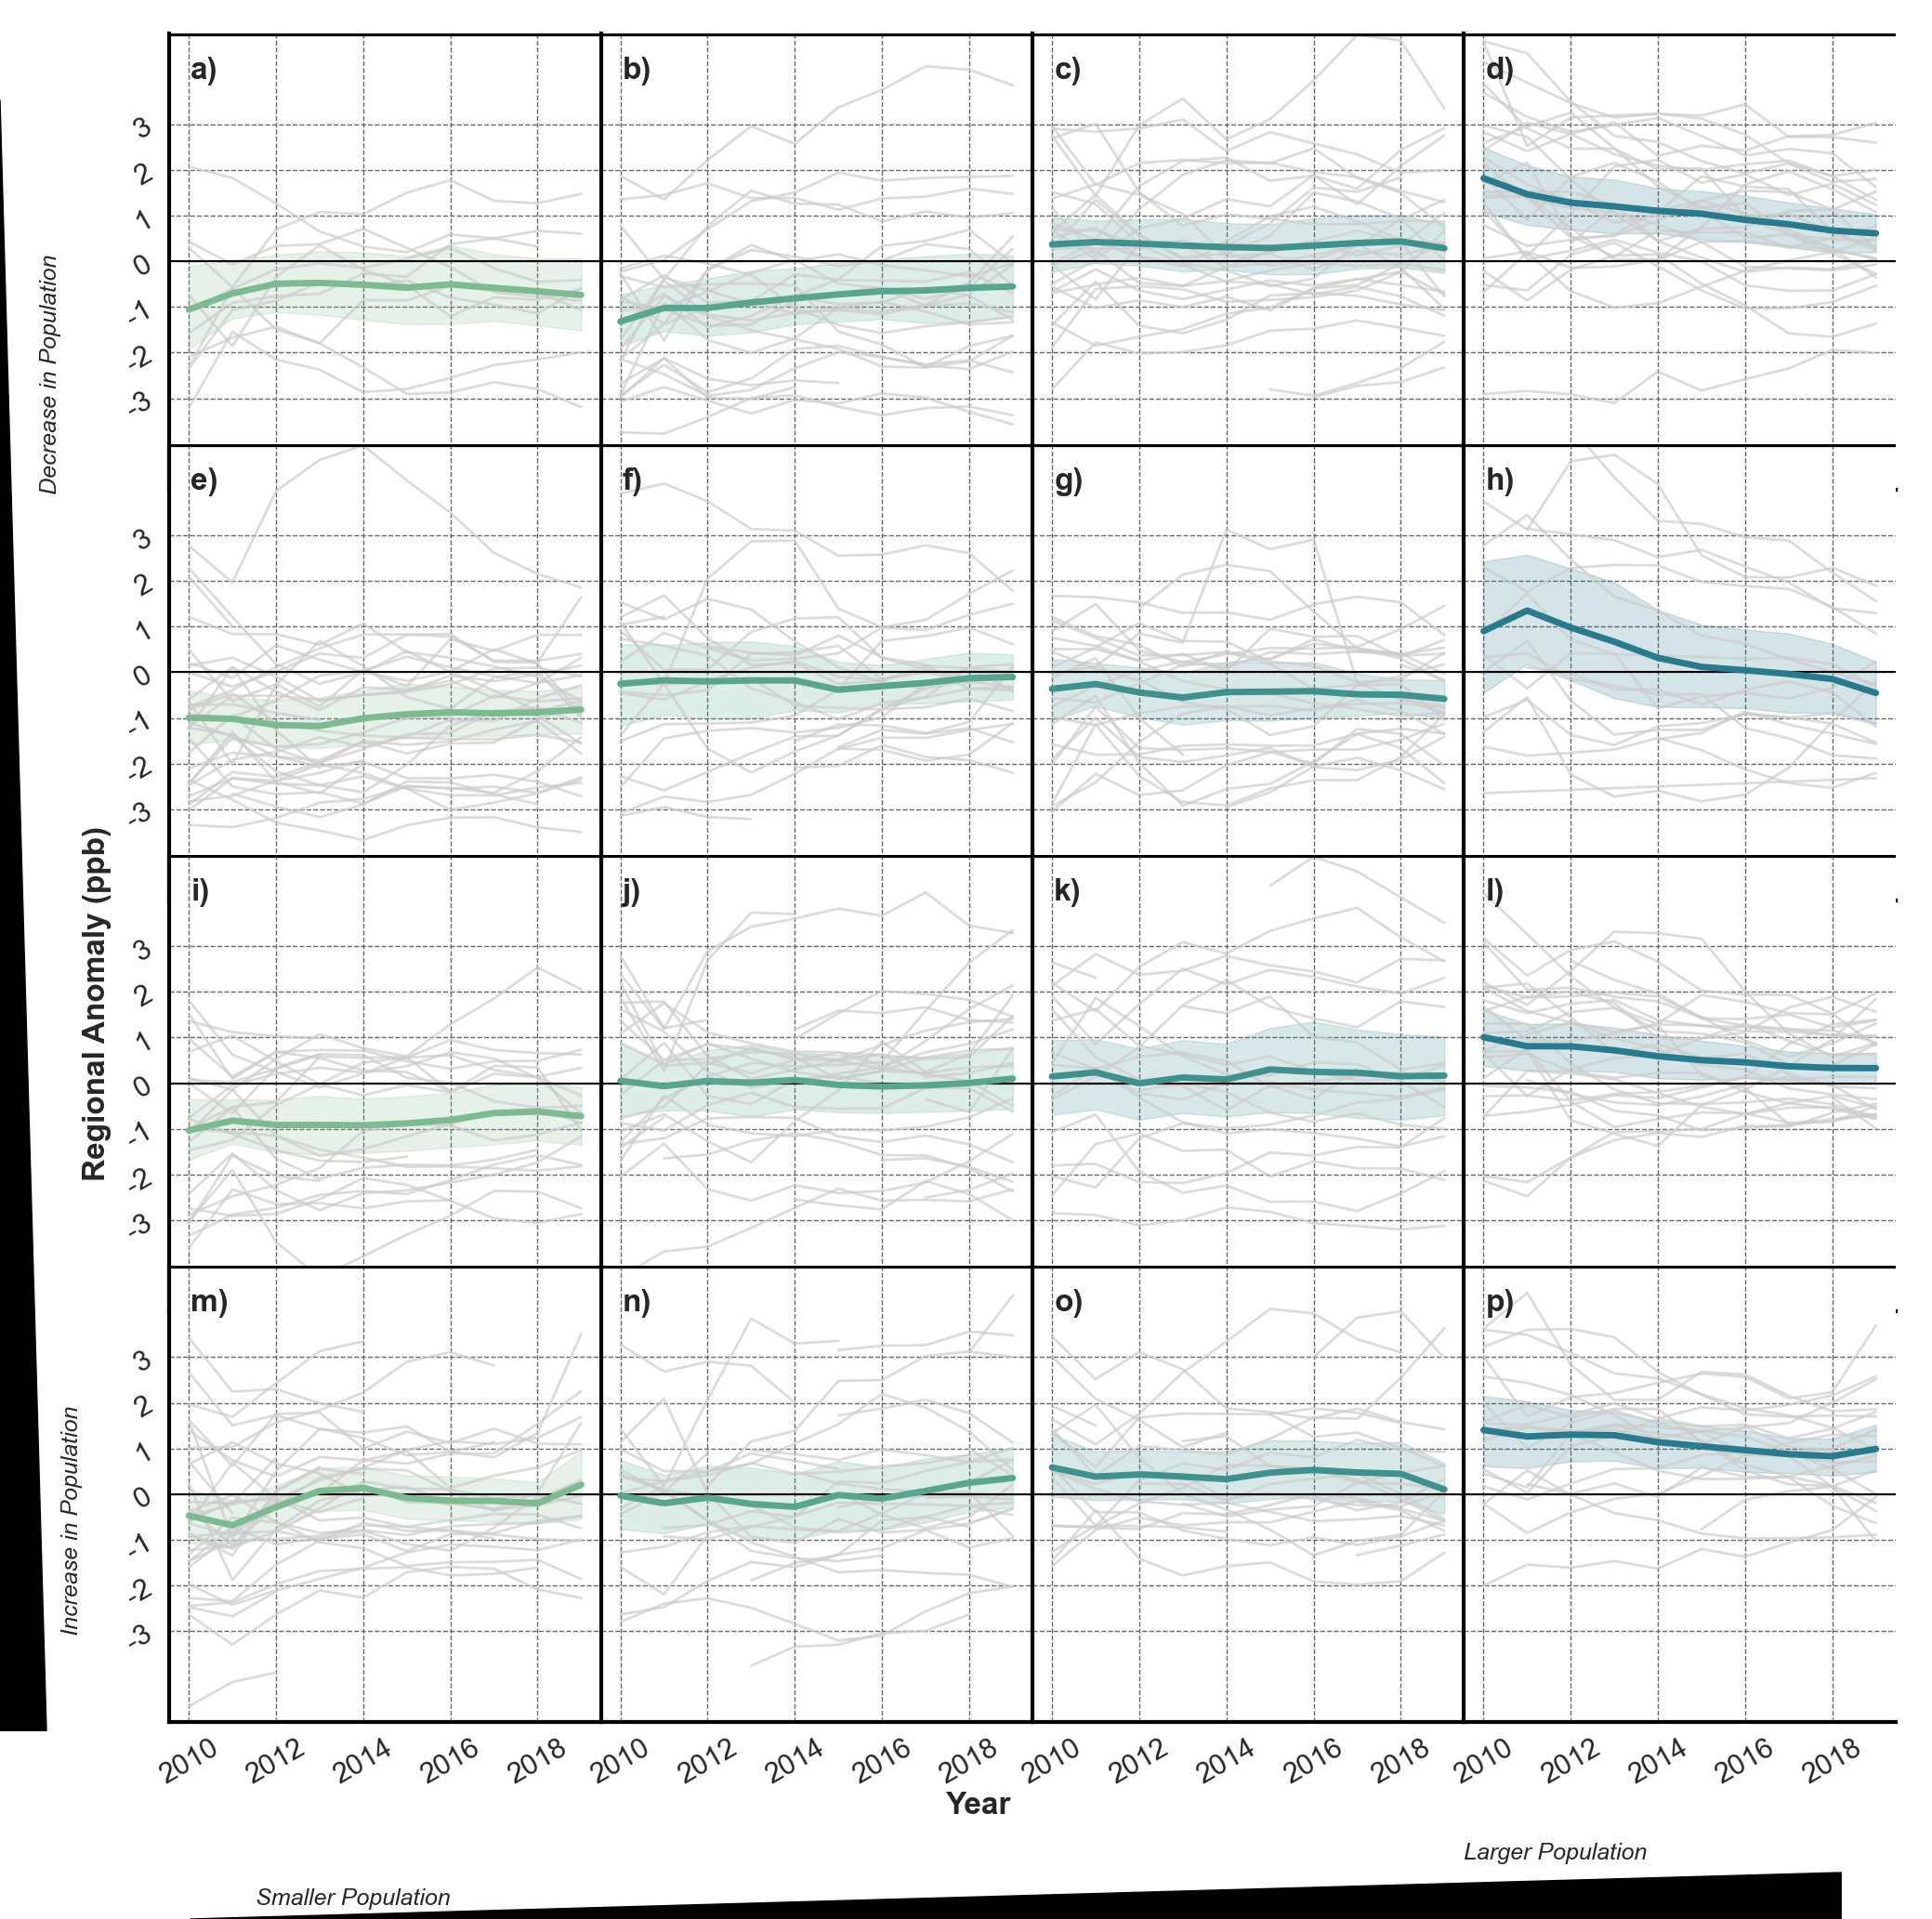

In [69]:
fig = plt.figure(figsize=(18, 18))
#sns.set_theme(style="whitegrid")
#ig.update_layout(margin=dict(l=10))
sns.set(font_scale=2,rc={'figure.figsize':(14,14)})
custom = {"grid.linestyle": "dashed", "grid.color": "0.4"}

sns.set_style("whitegrid",custom)
palette = sns.color_palette("crest")
g=sns.relplot(
    data=anomaly, kind="line",
    x="Year", y="RegionAnomaly",row='PopChPerc',
    col="PopPerc", size_order=[1.0,0.75,0.5,0.25],
    zorder=10, linewidth=5, hue='PopPerc',legend=False,palette=palette
)

count = 0 
for state, ax in g.axes_dict.items():
    ax.text(0.05, 0.9, lbl[count] +')', transform=ax.transAxes, fontweight="bold")
    #ax.text(.1, 1.15, 'Population  '+lbl1[count], transform=ax.transAxes,fontsize=16)
    #ax.text(.1, 1.05, 'NO2 in 2010 (ppb): '+state[1], transform=ax.transAxes,fontsize=16)
    if count==0:
        ax.annotate(text = '', xytext=(0,0.1),xy=(0,0.98),xycoords='figure fraction',arrowprops=dict(facecolor='black', edgecolor = 'black',arrowstyle=mpl.patches.ArrowStyle("wedge, tail_width=3"),zorder=3))
        ax.annotate(text = '', xy=(.1,0),xytext=(.98,0),xycoords='figure fraction',arrowprops=dict(facecolor='black', edgecolor = 'black',arrowstyle=mpl.patches.ArrowStyle("wedge, tail_width=3")),zorder=100)
        ax.text(-0.2,-1.5,s= 'Regional Anomaly (ppb)',transform=ax.transAxes,rotation='vertical',fontweight='bold')
        ax.text(-0.25,-2.5,s= r'Increase in Population',transform=ax.transAxes,rotation='vertical',fontstyle='italic',fontsize=18)
        ax.text(-0.3,0,s= r'Decrease in Population',transform=ax.transAxes,rotation='vertical',fontstyle='italic',fontsize=18)
        ax.margins
    if count == 12:
        ax.text(1.8,-0.2,s= 'Year',transform=ax.transAxes,rotation='horizontal',fontweight='bold')
        ax.text(0.2,-0.4,s= r'Smaller Population',transform=ax.transAxes,rotation='horizontal',fontstyle='italic',fontsize=18)
        ax.text(3,-0.3,s= r'Larger Population',transform=ax.transAxes,rotation='horizontal',fontstyle='italic',fontsize=18)
    sns.lineplot(
        data=anomaly.query('PopChPerc ==@state[0] & PopPerc ==@state[1]'), x="Year", y="RegionAnomaly", units="CityCountry",
        estimator=None, color='0.8',alpha = 0.7,linewidth=2, ax=ax,zorder=1
    )
    count +=1
for ax in g.axes.flat:
    ax.set_xticks(ticks=range(2010, 2019,2),labels =range(2010, 2019,2), rotation=30)
    ax.set_ylim([-5,5])
    ax.set_yticks(ticks=range(-3, 4,1),labels =range(-3, 4,1), rotation=30)
    #ax.set_yticks(ticks = range)
    # Add the title as an annotation within the plot
    for _,s in ax.spines.items():
        s.set_linewidth(3)
        s.set_color('black')
    ax.axhline(0, color='black',zorder=1)
    ax.axhline(5, color='black',linewidth=4.5,zorder=10)

g.set_titles("")
#g.despine(bottom=True)
g.add_legend()
#g.set_axis_labels("Year", "Regional Anomaly (ppb)")
#g.set_xticks(range(len(df)), labels=range(2010, 2019))
#g.tight_layout()
g.set_axis_labels("", "")
plt.subplots_adjust(hspace=-0.1, wspace=0)
#g.title('NO2 Anomaly from National Mean')
plt.savefig(output_dir+'/AnomalyRegion_no2start_PopChange.png')

In [130]:
df['GDPBins']

0      (64.503, 393.912]
1       (52.756, 64.503]
2      (64.503, 393.912]
3      (64.503, 393.912]
4      (64.503, 393.912]
             ...        
325     (11.959, 42.965]
326     (52.756, 64.503]
327     (42.965, 52.756]
328    (64.503, 393.912]
329    (64.503, 393.912]
Name: GDPBins, Length: 330, dtype: object

In [191]:
bins = list(df['PerCapita'].quantile([0,0.1,.2,0.3,.4,.5,.6,.7,.8,.9,1]))
df['GDPDeciles']=pd.cut(df['PerCapita'], bins=bins, include_lowest=True)

In [201]:
bins = list(df['GDP'].quantile([0,0.1,.2,0.3,.4,.5,.6,.7,.8,.9,1]))
df['GDPDeciles']=pd.cut(df['GDP'], bins=bins, include_lowest=True)

In [131]:
bins = list(df['GDP'].quantile([0,0.25,0.5,0.75,1]))
df['GDPQs']=pd.cut(df['GDP'], bins=bins, include_lowest=True)

In [84]:
bins = list(df['Base_NO2'].quantile([0,0.25,.5,0.75,1]))

df['NO2Start']=pd.cut(df.Base_NO2, bins=bins, include_lowest=True)

In [100]:
bins = list(df['PopPercChange'].quantile([0,0.25,.5,0.75,1]))
df['PopChPerc']=pd.cut(df['PopPercChange'], bins=bins, include_lowest=True)

In [176]:
titles = ['Q1','Q2','Q3','Q4']

In [136]:
titles = ['<10 ppb','10-11.5 ppb','11-13 ppb','>13 ppb',]

In [135]:
df.NO2Start.unique()

[(9.94, 11.525], (12.958, 19.01], (11.525, 12.958], (5.669, 9.94]]
Categories (4, interval[float64, right]): [(5.669, 9.94] < (9.94, 11.525] < (11.525, 12.958] < (12.958, 19.01]]

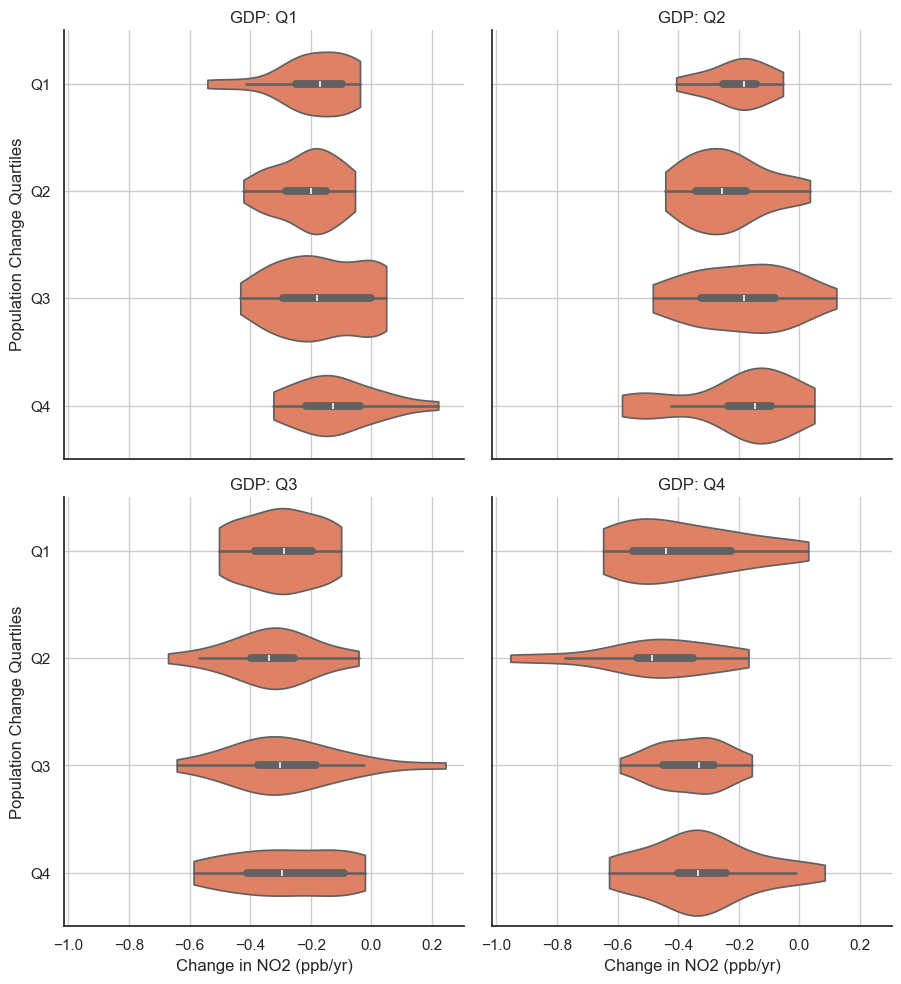

In [178]:
sns.set(font_scale=1)
sns.set_theme(style='white')
g = sns.FacetGrid(data=df.sort_values(by='PopPercChange'), col="GDPQs", col_wrap=2,margin_titles=False,height=5, aspect=1/1)
g.map_dataframe(sns.violinplot,x='Slope',y='PopChPerc',color =palette[1],density_norm="count",cut=0)
g.set(xlabel='Change in NO2 (ppb/yr)', ylabel='Population Change Quartiles')
#g.set_yticklabels(labels=['1','2','3','4','5','6','7','8','9','10'])
g.set_yticklabels(labels=['Q1','Q2','Q3','Q4'])
sns.set_theme(style="whitegrid", palette="pastel")
sns.set(rc={'figure.figsize':(11.7,11.7)})
for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title='GDP: '+title)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
plt.savefig(output_dir+'/GDP_Q_NO2_Start_ppopch_gdp_norm.png',bbox_inches='tight',dpi=200)

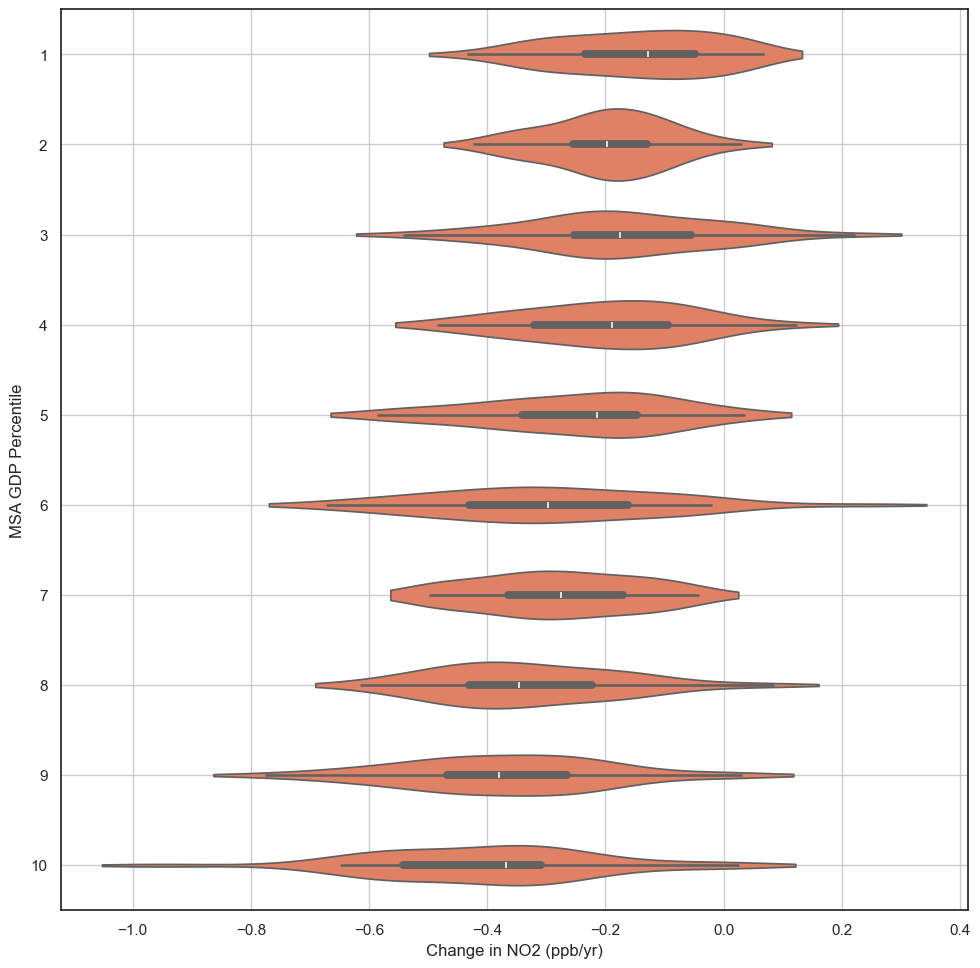

In [202]:
#df['y'] = [f'{x:.2f}' for x in df['GDPBins']]
sns.set_theme(style='white')
palette = sns.color_palette("rocket_r")
ax = sns.violinplot(data=df.sort_values(by='GDP'), x='Slope',y='GDPDeciles',color =palette[1],legend=True,cut = True)#hue='Memberships',hue_order = [0,'1+'],#color='0.7',
            #kind='violin',split=True)
#ax = sns.swarmplot(data=ddf[ddf['y']!='nan'].sort_values('y'), x='NO2_Slope',y='y',color =palette[0],size=2)#hue='Memberships',hue_order = [0,'1+'],#color='0.7',
            #kind='violin',split=True)
#ax.legend(title='Population Change', loc='upper left', labels=['Q1','Q2','Q3','Q4'])

#ax = sns.lineplot(y='y', x='Slope', data=df[df['y']!='nan'].sort_values('y'),orient="y",estimator='median',  color=palette[5],errorbar=('ci',95), legend=False, ax=ax)
ax.set(xlabel='Change in NO2 (ppb/yr)', ylabel='MSA GDP Percentile')
#ax.set_yticks(ticks = range(4),labels=['Q1','Q2','Q3','Q4'])
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_yticks(ticks = range(10),labels=['1','2','3','4','5','6','7','8','9','10'])
#sns.swarmplot(data=ddf, x="PopRatioPercent", y="GDPPerc",hue='Memberships',hue_order = [0,'1+'],size=3)
plt.savefig(output_dir +'/US_Slope GDP Deciles.png', dpi=200)


In [234]:
df['ChangeCapita']= (df.PerCapita-df.Base_PerCapita)/df.Base_PerCapita

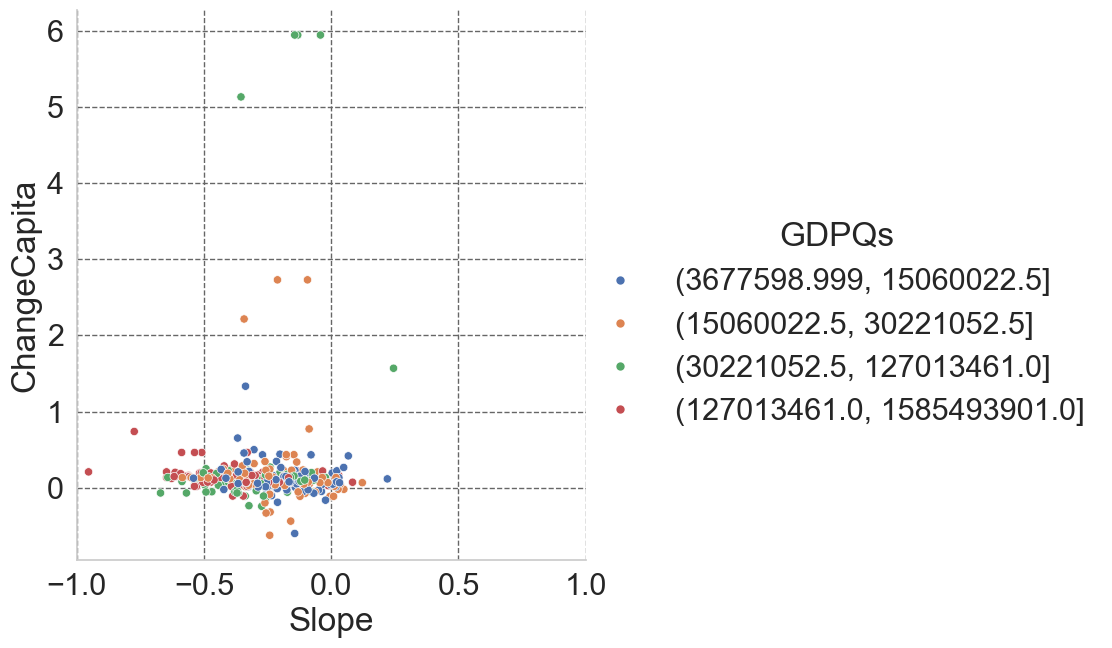

In [242]:
g = sns.relplot(x="Slope", y="ChangeCapita", data=df,hue='GDPQs',
                  color="m", height=7)
g.set(xlim=[-1,1])

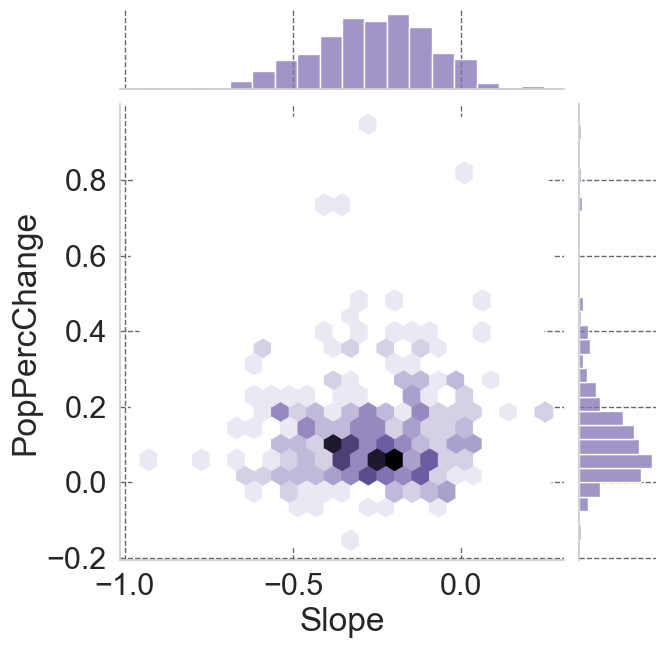

In [246]:
g = sns.jointplot(x="Slope", y="PopPercChange", data=df,
                  kind="hex",
                  #xlim=(-1, 0.5),ylim = (-0.5,1),
                  color="m", height=7)
#plt.yscale('log')

In [247]:
df.columns

Index(['CityCountry', 'Memberships', 'continent', 'Year', 'City', 'Country',
       'Latitude', 'Longitude', 'Population', 'NO2', 'Pw_NO2', 'PAF_NO2',
       'Cases_NO2', 'Rates_NO2', 'Pop_ped', 'city_area', 'NAME_LIST', 'Slope',
       'Base_GDP', 'GDP', 'Base_NO2', 'Base_Population', 'NO2T', 'BaseT',
       'LogGDP', 'State', 'Region', 'Predicted', 'Actual', 'pc_dif', 'abs_dif',
       'Residuals', 'PerCapita', 'ConcPercChange', 'ConcChange_Score',
       'slope_Score', 'resid_Score', 'Total_Score', 'GDPBins', 'PopChange',
       'PopChangeBins', 'Base_PerCapita', 'PopPercChange', 'GDPDeciles',
       'NO2Start', 'PopChPerc', 'GDPQs', 'ChangeCapita'],
      dtype='object')

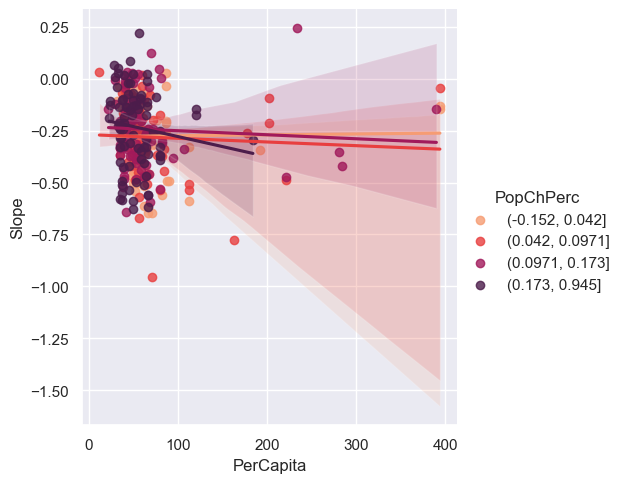

In [296]:
g = sns.lmplot(
    data=df,
    x="PerCapita", y="Slope", hue="PopChPerc", palette='rocket_r',robust=True,
    height=5
)

#plt.xscale('log')

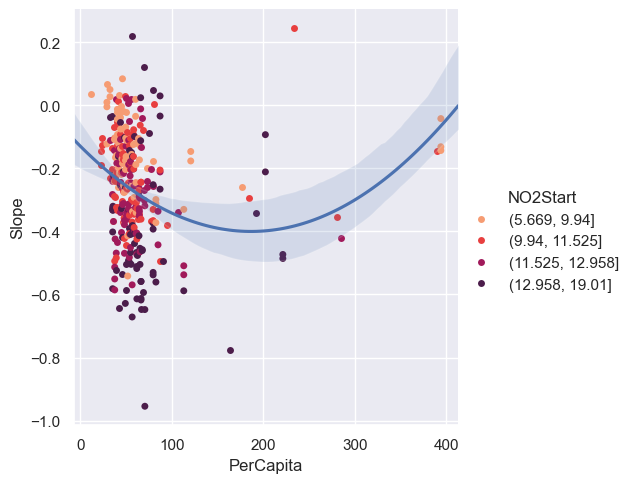

In [280]:
sns.set(font_scale=1)
sns.catplot(
    data=df, x="PerCapita", y="Slope", hue = 'NO2Start',palette ='rocket_r',
    native_scale=True, zorder=1
)

g=sns.regplot(
    data=df, x="PerCapita", y="Slope", #palette ='rocket_r',
    scatter=False, truncate=False, order=2, #color=".2",
) 
#g.set(xlim=(0,1e9))
#plt.xscale('log')

In [161]:
nemo = pd.read_csv('Inputs/AllCities_NEMO.csv', index_col = 0)

In [155]:
us = 'United States'
cities = pd.read_csv('Inputs/unified_data_SR-v4.csv').query('Country ==@us')['I']drop_duplicates()


In [162]:
nemo = nemo.T


In [171]:
id = df.merge(cities.reset_index())

In [166]:
nemo.merge(cities, how = 'left',left_index=True,right_index=True)

onroad       nonroad        nonpt     airports   np_oilgas  afdust  \
14   39301.144531  11741.595703  5855.120117  3096.876465  161.556412     0.0   
10   13134.457031   4537.009277  4177.712402  2257.302246    0.907405     0.0   
16     216.644318     75.875786    56.676994     0.011144    2.032144     0.0   
24     419.644592    177.385742   107.180832     0.010845    2.460941     0.0   
885   6981.096680   1458.670654  2053.035645   575.939453    0.000000     0.0   
..            ...           ...          ...          ...         ...     ...   
553    286.964386    241.695618    32.238213     0.009138    0.000000     0.0   
521    266.224152     49.421795    13.098722     0.000000    0.000000     0.0   
451    793.609375    193.529282   574.259155    39.112068    0.000000     0.0   
512   1378.729004    623.074707  3827.585938    12.809952    0.000000     0.0   
235    477.081360     87.566414   125.061729     0.763062   39.330334     0.0   

      ag         rail         rwc CityCountry  
14   0.0  4097.723633  144.519257         NaN  
10   0.0  1615.047119  106.640610         NaN  
16   0.0     9.869876    7.965990         NaN  
24   0.0    37.537865    3.672646         NaN  
885  0.0   209.253815   80.696846         NaN  
..   ...          ...         ...         ...  
553  0.0     4.189938    4.742221         NaN  
521  0.0     0.000000    5.758780         NaN  
451  0.0    23.400673    7.091327         NaN  
512  0.0   152.916382   19.712646         NaN  
235  0.0    22.211210    0.722665         NaN  

[323 rows x 10 columns]

In [ ]:
sns.set_theme(style="whitegrid")
#f, ax = plt.subplots(figsize=(18,10))
sns.despine(bottom=True, left=True)
# Show each observation with a scatterplot
sns.catplot(
    data=anom_cdf, kind= 'bar',x="Slope_Q", y="value", col="variable",col_wrap=4,
    alpha=.7, zorder=1, legend=False, errorbar=None,
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
""" sns.pointplot(
    data=cityp_v1, x="value", y="variable", hue="Slope_Q",
    dodge=.8 - .8 / 3, palette="crest", errorbar=None,
    markers="d", markersize=4, linestyle="none",
) """

# Improve the legend
""" sns.move_legend(
    ax, loc="upper right", ncol=1, frameon=True, columnspacing=1, handletextpad=0,bbox_to_anchor=(1.1, 1)
) """